In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
# Set Directories
train_dir = r"C:\Users\TUSHAR CHOUDHARY\Downloads\train"
test_dir = r"C:\Users\TUSHAR CHOUDHARY\Downloads\test"

In [3]:
# Preprocessing
img_height, img_width = 64, 64
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20,
                                   zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 18000 images belonging to 1 classes.
Found 6000 images belonging to 1 classes.


In [4]:
# Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

C:\Users\TUSHAR CHOUDHARY\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

C:\Users\TUSHAR CHOUDHARY\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


C:\Users\TUSHAR CHOUDHARY\anaconda\Lib\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\Users\TUSHAR CHOUDHARY\anaconda\Lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


563/563 ━━━━━━━━━━━━━━━━━━━━ 444s 780ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 106s 188ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 100s 177ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 99s 177ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 101s 179ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 1210s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 133s 236ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━

In [7]:
# Evaluate Model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Accuracy: 1.00


In [8]:
# Classification Report
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print("Classification Report:\n")
print(classification_report(test_generator.classes, y_pred, target_names=list(test_generator.class_indices.keys())))

  1/188 ━━━━━━━━━━━━━━━━━━━━ 1:10 377ms/step

C:\Users\TUSHAR CHOUDHARY\anaconda\Lib\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step
Classification Report:

              precision    recall  f1-score   support

        test       1.00      1.00      1.00      6000

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



C:\Users\TUSHAR CHOUDHARY\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


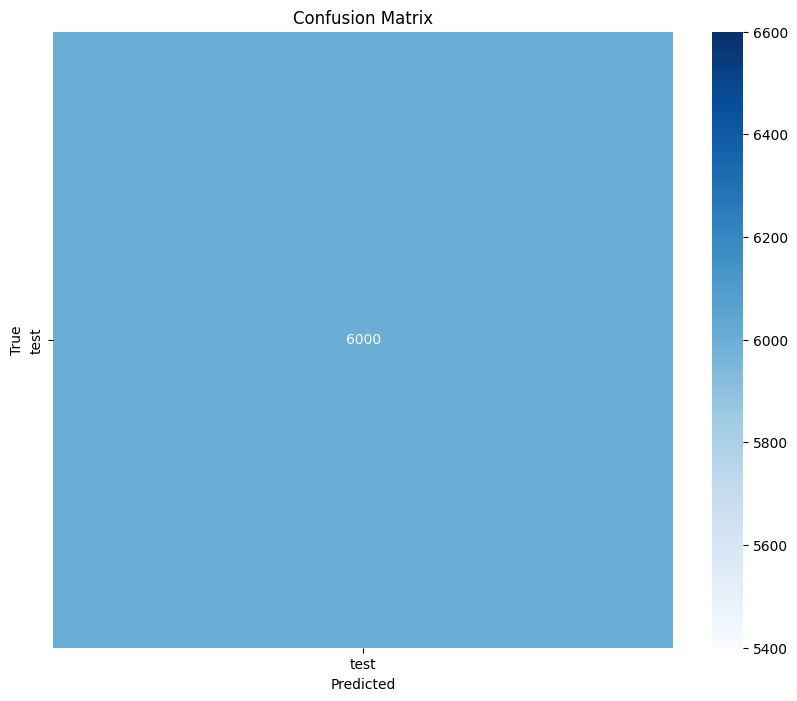

In [9]:
# Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys(), cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

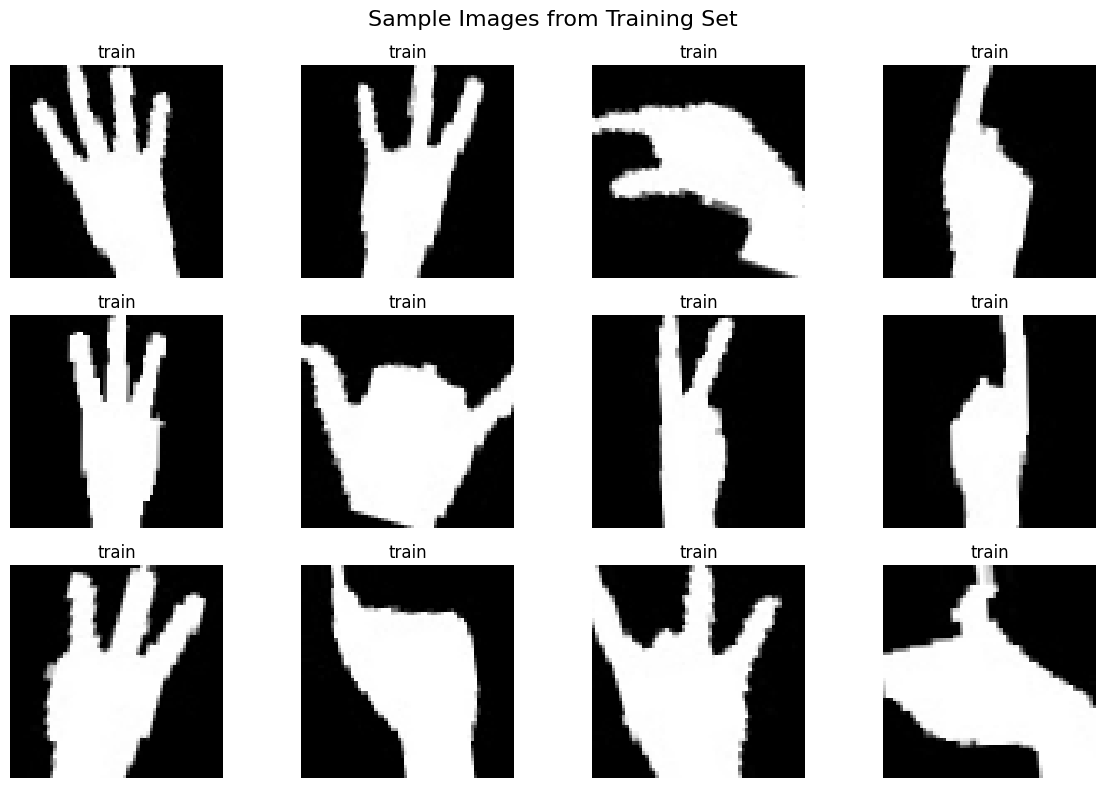

In [10]:
# Display some sample images from the training set
class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(12, 8))
for images, labels in train_generator:
    for i in range(12):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
    break
plt.suptitle("Sample Images from Training Set", fontsize=16)
plt.tight_layout()
plt.show()

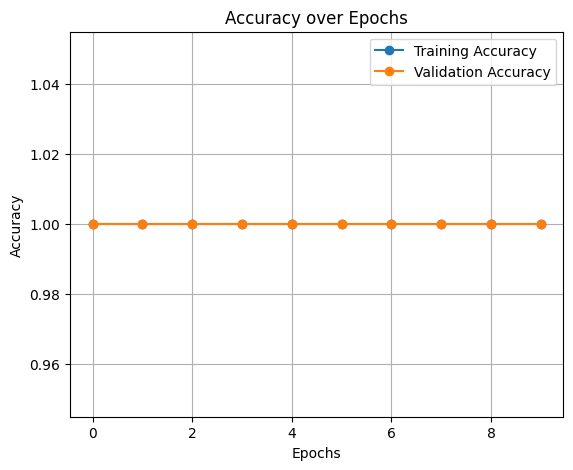

In [11]:
# Plot accuracy and loss curves
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

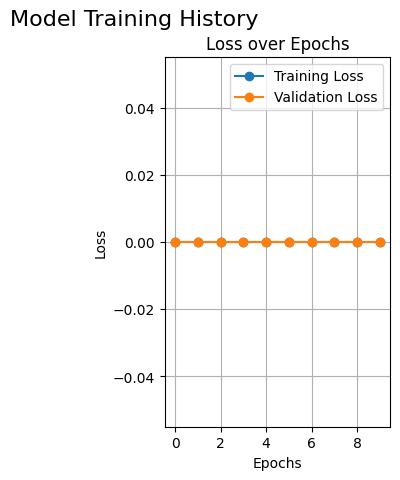

In [12]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.suptitle("Model Training History", fontsize=16)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


C:\Users\TUSHAR CHOUDHARY\anaconda\Lib\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


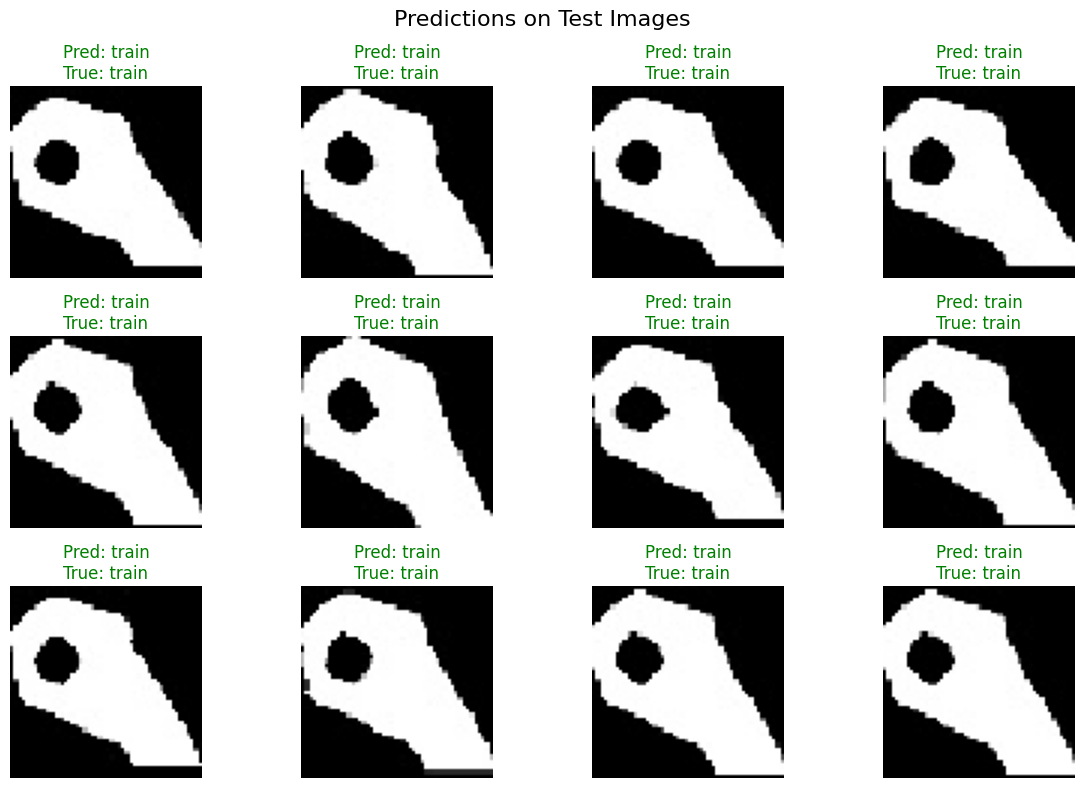

In [13]:
# Visualize predictions on some test images
import random

test_images, test_labels = next(test_generator)
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

plt.figure(figsize=(12, 8))
for i in range(12):
    index = random.randint(0, len(test_images) - 1)
    plt.subplot(3, 4, i + 1)
    plt.imshow(test_images[index])
    plt.title(f"Pred: {class_names[predicted_classes[index]]}\nTrue: {class_names[true_classes[index]]}",
              color="green" if predicted_classes[index] == true_classes[index] else "red")
    plt.axis('off')
plt.suptitle("Predictions on Test Images", fontsize=16)
plt.tight_layout()
plt.show()